In [2]:
# Some imports we will need for this notebook
import Augmentor
import numpy as np
from PIL import Image
import glob
from natsort import natsorted
import os
import random
import requests
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
imgs_a1 = natsorted(glob.glob("e:/s2/train/A1/*.png"))
imgs_a2 = natsorted(glob.glob("e:/s2/train/A2/*.png"))
imgs_a3 = natsorted(glob.glob("e:/s2/train/A3/*.png"))
imgs_a4 = natsorted(glob.glob("e:/s2/train/A4/*.png"))
imgs_a5 = natsorted(glob.glob("e:/s2/train/A5/*.png"))
imgs_b  = natsorted(glob.glob("e:/s2/train/B/*.png"))

In [4]:
collated = list(zip(imgs_a1, imgs_a2, imgs_a3, imgs_a4, imgs_a5, imgs_b))
images = [[np.asarray(Image.open(y)) for y in x] for x in collated]

In [16]:
p1 = Augmentor.DataPipeline(images)
p1.zoom()
p1.sample(3)

TypeError: sample() got an unexpected keyword argument 'multi_threaded'

In [42]:
r_index = random.randint(0, len(augmented_images)-1)
f, axarr = plt.subplots(1, 3, figsize=(256,256))
axarr[0].imshow(augmented_images[r_index][0], cmap='gray')
axarr[1].imshow(augmented_images[r_index][1], cmap='gray')
axarr[2].imshow(augmented_images[r_index][5], cmap='gray')

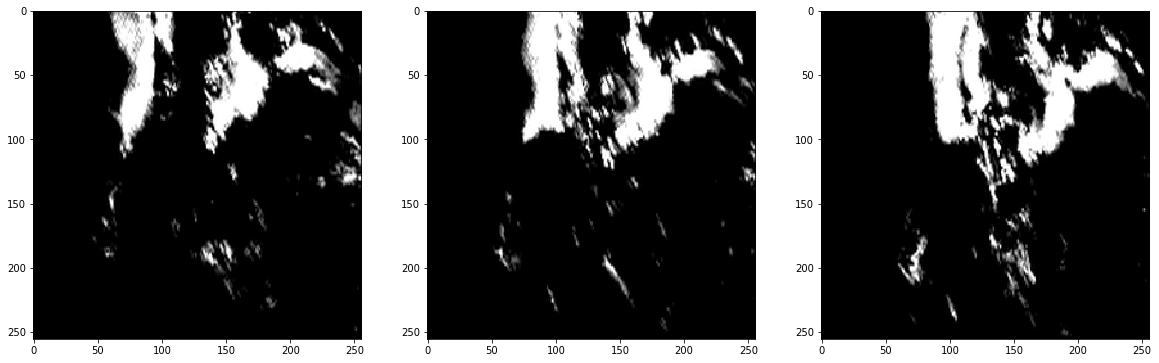

In [37]:
f, axarr = plt.subplots(1, 3, figsize=(20,15))
axarr[0].imshow(plt.imread(imgs_b[0]), cmap='gray')
axarr[1].imshow(plt.imread(imgs_b[1]), cmap='gray')
axarr[2].imshow(plt.imread(imgs_b[2]), cmap='gray')

In [13]:
help(Augmentor.DataPipeline.__init__)

Help on function __init__ in module Augmentor.Pipeline:

__init__(self, images, labels=None)
    Create a new Pipeline object pointing to a directory containing your
    original image dataset.
    
    Create a new Pipeline object, using the :attr:`source_directory`
    parameter as a source directory where your original images are
    stored. This folder will be scanned, and any valid file files
    will be collected and used as the original dataset that should
    be augmented. The scan will find any image files with the extensions
    JPEG/JPG, PNG, and GIF (case insensitive).
    
    :param source_directory: A directory on your filesystem where your
     original images are stored.
    :param output_directory: Specifies where augmented images should be
     saved to the disk. Default is the directory **output** relative to
     the path where the original image set was specified. If it does not
     exist it will be created.
    :param save_format: The file format to use when sav

In [24]:
def rot(path,savedir):
    p = Augmentor.Pipeline(path, save_format='png', output_directory=savedir)
    p.rotate90(1)
    p.process()

def flip(path,savedir):
    p = Augmentor.Pipeline(path, save_format='png', output_directory=savedir)
    p.flip_left_right(1)
    p.process()

paths = [
    "e:/s2/train/A1",
    "e:/s2/train/A2",
    "e:/s2/train/A3",
    "e:/s2/train/A4",
    "e:/s2/train/A5",
    "e:/s2/train/B"
]

In [21]:
for pa in paths:
    rot(pa, pa.replace('train', 'aug'))

Initialised with 1296 image(s) found.
Output directory set to e:/s2/aug/A1.

Processing <PIL.Image.Image image mode=L size=256x256 at 0x2E1D0A58>: 100%|█| 1296/1296 [00:04<00:00, 280.56 Samples/s]


Initialised with 1296 image(s) found.
Output directory set to e:/s2/aug/A2.

Processing <PIL.Image.Image image mode=L size=256x256 at 0x1C1933C8>: 100%|█| 1296/1296 [00:04<00:00, 293.86 Samples/s]


Initialised with 1296 image(s) found.
Output directory set to e:/s2/aug/A3.

Processing <PIL.Image.Image image mode=L size=256x256 at 0xEFECE80>: 100%|█| 1296/1296 [00:05<00:00, 244.38 Samples/s] 


Initialised with 1296 image(s) found.
Output directory set to e:/s2/aug/A4.

Processing <PIL.Image.Image image mode=L size=256x256 at 0x1C1C93C8>: 100%|█| 1296/1296 [00:04<00:00, 284.13 Samples/s]


Initialised with 1296 image(s) found.
Output directory set to e:/s2/aug/A5.

Processing <PIL.Image.Image image mode=L size=256x256 at 0x1C0FA978>: 100%|█| 1296/1296 [00:04<00:00, 281.66 Samples/s]


Initialised with 1296 image(s) found.
Output directory set to e:/s2/aug/B.

Processing <PIL.Image.Image image mode=L size=256x256 at 0x1C1D44E0>: 100%|█| 1296/1296 [00:02<00:00, 576.74 Samples/s]


In [25]:
for pa in paths:
    flip(pa, pa.replace('train', 'flip_l_r'))

Initialised with 1296 image(s) found.
Output directory set to e:/s2/flip_l_r/A1.

Processing <PIL.Image.Image image mode=L size=256x256 at 0x2E466400>: 100%|█| 1296/1296 [00:04<00:00, 284.01 Samples/s]


Initialised with 1296 image(s) found.
Output directory set to e:/s2/flip_l_r/A2.

Processing <PIL.Image.Image image mode=L size=256x256 at 0x2E1E2CF8>: 100%|█| 1296/1296 [00:04<00:00, 293.00 Samples/s]


Initialised with 1296 image(s) found.
Output directory set to e:/s2/flip_l_r/A3.

Processing <PIL.Image.Image image mode=L size=256x256 at 0x1C1D4390>: 100%|█| 1296/1296 [00:05<00:00, 243.92 Samples/s]


Initialised with 1296 image(s) found.
Output directory set to e:/s2/flip_l_r/A4.

Processing <PIL.Image.Image image mode=L size=256x256 at 0x1C47D6A0>: 100%|█| 1296/1296 [00:04<00:00, 282.89 Samples/s]


Initialised with 1296 image(s) found.
Output directory set to e:/s2/flip_l_r/A5.

Processing <PIL.Image.Image image mode=L size=256x256 at 0x1C06FB00>: 100%|█| 1296/1296 [00:04<00:00, 274.21 Samples/s]


Initialised with 1296 image(s) found.
Output directory set to e:/s2/flip_l_r/B.

Processing <PIL.Image.Image image mode=L size=256x256 at 0x1C1C4390>: 100%|█| 1296/1296 [00:02<00:00, 570.64 Samples/s]
